**Equipe:** Camila Lopes e Giovani Moutinho  
**Disciplina:** Tópicos em Inteligência Computacional  
**Professora:** Luciana Balieiro Cosme  
**Curso:** Ciência da Computação 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

dados = pd.read_csv('../dadosExtraidos.csv')
dados.shape

(75, 16)

In [3]:
dados.columns[1:14]

Index(['Ano_Ingresso', 'Joga_Algo', 'Joga_LoL', 'Nick', 'CR', 'Nivel',
       'Num_Partidas', 'Horas_Jogadas', 'Campeao_Preferido', 'Maestria', 'Elo',
       'Divisao', 'Vitorias'],
      dtype='object')

In [4]:
tabela = pd.DataFrame(dados, columns = ['Ano_Ingresso', 'CR', 'Joga_Algo', 'Joga_LoL', 'Nivel', 'Num_Partidas', 
                                            'Horas_Jogadas', 'Campeao_Preferido', 'Maestria', 'Elo', 'Divisao', 
                                            'Vitorias', 'Derrotas', 'Porcentagem_Vitorias'])
tabela.head()

,Ano_Ingresso,CR,Joga_Algo,Joga_LoL,Nivel,Num_Partidas,Horas_Jogadas,Campeao_Preferido,Maestria,Elo,Divisao,Vitorias,Derrotas,Porcentagem_Vitorias
0,2015,60.6,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,53.0,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,43.8,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,42.0,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,68.4,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#retira os nulos (não tem CR)
tabela=tabela.loc[(tabela['CR'].notnull())]

In [29]:
#análise inicial dos dados encontrados
jogaLol = tabela[tabela['Joga_LoL']==True]
naoJogaLol2 = tabela[tabela['Joga_LoL']==False]
naoJogaLol2 = naoJogaLol2[naoJogaLol2['Joga_Algo']==True]
joga = tabela[tabela['Joga_Algo']==True]
nJoga = tabela[tabela['Joga_Algo']==False]


d = {'Grupo' : ['Geral', 'Joga Algo', 'Joga LoL', 'Joga Outros', 'Não Joga'], 
     'CR' : [tabela['CR'].mean(), joga['CR'].mean(), jogaLol['CR'].mean(), naoJogaLol2['CR'].mean(), nJoga['CR'].mean()], 
     'Qtd Amostras' : [len(tabela), len(joga), len(jogaLol), len(naoJogaLol2), len(nJoga)],
    '%' : ['100%', (len(joga)*100)/(len(joga)+len(nJoga)), (len(jogaLol)*100)/len(tabela), (len(naoJogaLol2)*100)/len(tabela), (len(nJoga)*100)/(len(tabela))]}
medias = pd.DataFrame(data=d)
medias

,Grupo,CR,Qtd Amostras,%
0,Geral,59.821831,71,100%
1,Joga Algo,58.587736,53,74.6479
2,Joga LoL,61.090909,22,30.9859
3,Joga Outros,56.811290,31,43.662
4,Não Joga,63.455556,18,25.3521


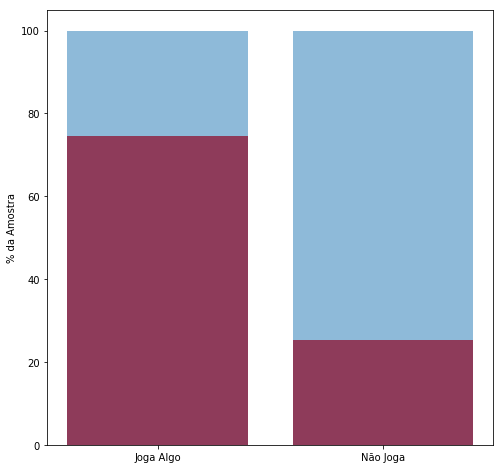

In [12]:
plt.figure(figsize=(8,8))
barras = [(len(joga)*100)/(len(joga)+len(nJoga)), (len(nJoga)*100)/(len(joga)+len(nJoga))]
total = [100, 100]
labels = ['Joga Algo', 'Não Joga']

plt.bar(np.arange(len(barras)), barras, color='red')
plt.bar(np.arange(len(barras)), total, alpha=0.5)
plt.xticks(np.arange(len(barras)), labels)
plt.ylabel('% da Amostra')

plt.show()

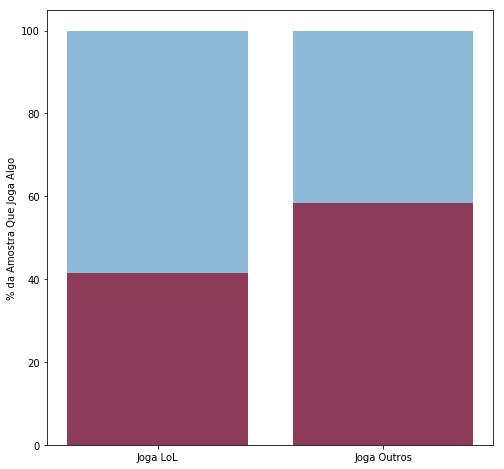

In [13]:
plt.figure(figsize=(8,8))
barras = [(len(jogaLol)*100)/len(joga), (len(naoJogaLol2)*100)/len(joga)]
labels = ['Joga LoL', 'Joga Outros']
total = [100, 100]

plt.bar(np.arange(len(barras)), barras, color='red')
plt.bar(np.arange(len(barras)), total, alpha=0.5)
plt.xticks(np.arange(len(barras)), labels)
plt.ylabel('% da Amostra Que Joga Algo')

plt.show()

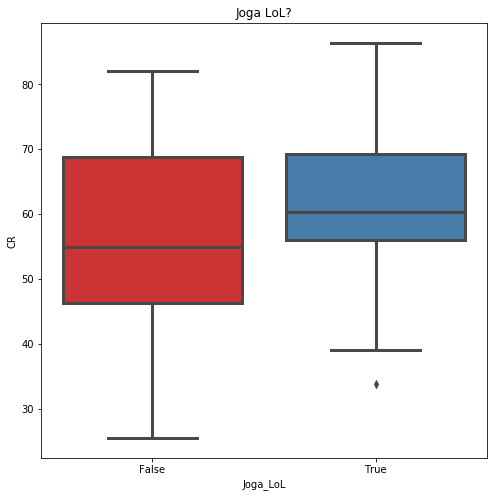

In [14]:
#Alunos que não jogam LoL mas jogam outros jogos x Alunos que jogam LoL
tabela2 = [naoJogaLol2, jogaLol]
tabela2 = pd.concat(tabela2)

plt.figure(figsize=(8,8))
sns.boxplot(x='Joga_LoL', y='CR', palette="Set1", data=tabela2, linewidth=3)
plt.title('Joga LoL?')
plt.show()

(0.9593729972839355, 0.280799925327301)
(0.9821275472640991, 0.9459373950958252)


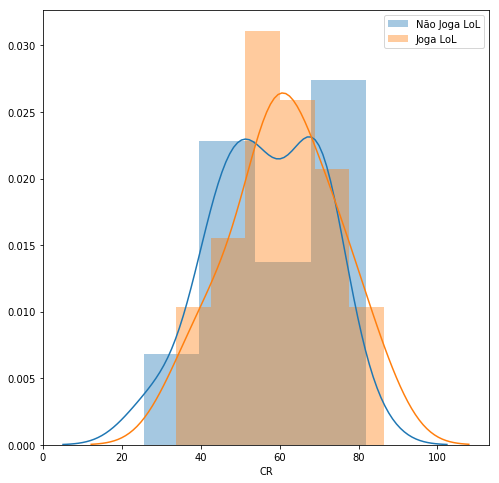

Kruskal-Wallis: Estatisticas=1.115, p=0.291
Mesma distribuição


In [18]:
#teste das suposições

print(stats.shapiro(tabela2.CR.loc[tabela2.Joga_LoL == False]))
print(stats.shapiro(tabela2.CR.loc[tabela2.Joga_LoL == True]))

#a saída do teste é o valor W e o p-value
#considera-se que a suposição não é violada quando o p-value é maior que alpha, normalmente 0.05

#pelo histograma, também é possível observar a distribuição dos dados. 
plt.figure(figsize=(8,8))
sns.distplot(tabela2.CR.loc[tabela2.Joga_LoL == False])
sns.distplot(tabela2.CR.loc[tabela2.Joga_LoL == True])
plt.xlabel('CR')
plt.legend(['Não Joga LoL', 'Joga LoL'])
plt.show()

alpha = 0.05
stat, p = stats.kruskal(tabela2.CR.loc[tabela2.Joga_LoL == False], tabela2.CR.loc[tabela2.Joga_LoL == True])
print('Kruskal-Wallis: Estatisticas=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')

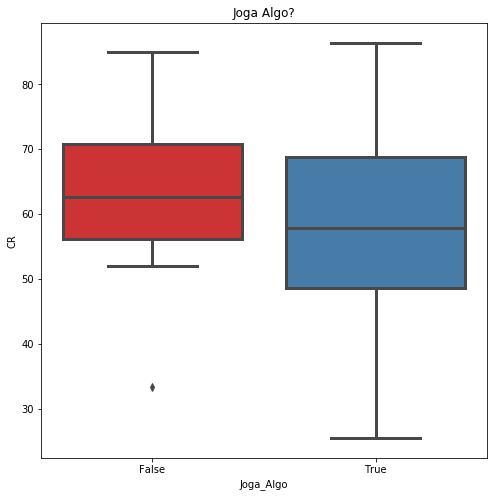

In [19]:
# Alunos que não jogam x Alunos que jogam algum tipo de jogo
categad = pd.DataFrame(tabela, columns=['CR', 'Joga_Algo'])
plt.figure(figsize=(8,8))
sns.boxplot(x='Joga_Algo', y='CR', palette="Set1", data=categad, linewidth=3)
plt.title('Joga Algo?')
plt.show()

(0.9517320394515991, 0.45283201336860657)
(0.9821207523345947, 0.6073752641677856)


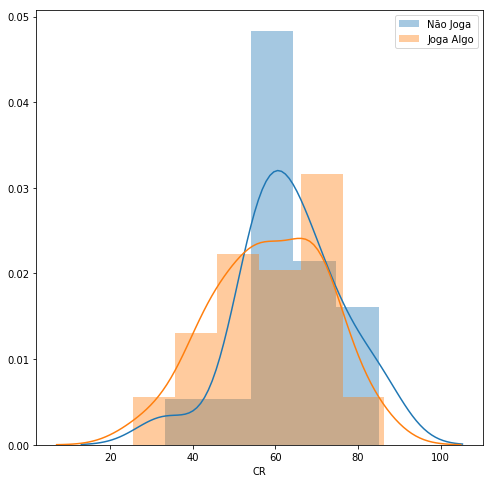

Kruskal-Wallis: Estatisticas=1.854, p=0.173
Mesma distribuição


In [21]:
print(stats.shapiro(categad.CR.loc[categad.Joga_Algo == False]))
print(stats.shapiro(categad.CR.loc[categad.Joga_Algo == True]))

#a saída do teste é o valor W e o p-value
#considera-se que a suposição não é violada quando o p-value é maior que alpha, normalmente 0.05

#pelo histograma, também é possível observar a distribuição dos dados. 
plt.figure(figsize=(8,8))
sns.distplot(categad.CR.loc[categad.Joga_Algo == False])
sns.distplot(categad.CR.loc[categad.Joga_Algo == True])
plt.xlabel('CR')
plt.legend(['Não Joga', 'Joga Algo'])
plt.show()

alpha = 0.05
stat, p = stats.kruskal(categad.CR.loc[categad.Joga_Algo == False], categad.CR.loc[categad.Joga_Algo == True])
print('Kruskal-Wallis: Estatisticas=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')

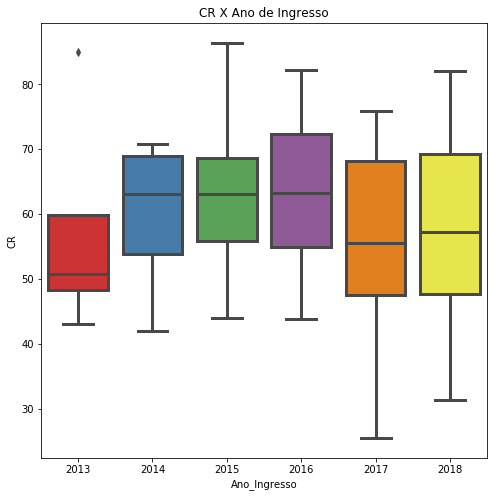

In [23]:
# Ano de Ingresso x CR
categad = pd.DataFrame(tabela, columns=['CR', 'Ano_Ingresso'])
plt.figure(figsize=(8,8))
sns.boxplot(x='Ano_Ingresso', y='CR', palette="Set1", data=categad, linewidth=3)
plt.title('CR X Ano de Ingresso')
plt.show()

Text(0.5, 0, 'Turma')

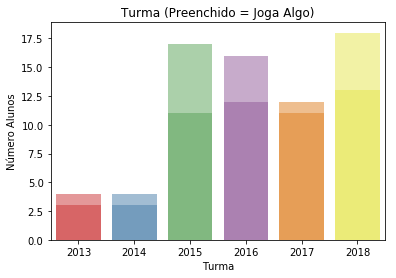

In [39]:
#quantidade de alunos por turma
sns.countplot(x='Ano_Ingresso', data=tabela, palette='Set1', alpha=0.5)
sns.countplot(x='Ano_Ingresso', data=joga, palette='Set1', alpha=0.5)
plt.title('Turma (Preenchido = Joga Algo)')
plt.ylabel('Número Alunos')
plt.xlabel('Turma')

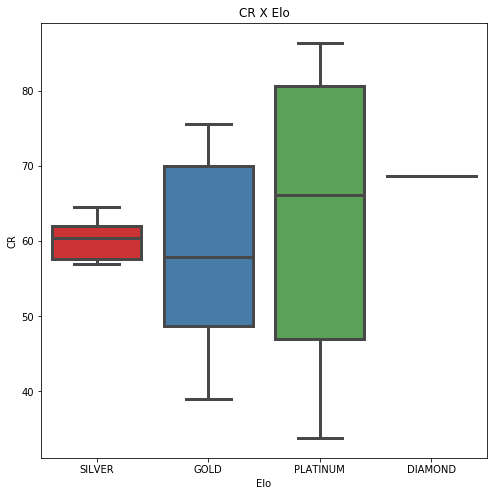

Média de CR do Prata:  CR    60.25
dtype: float64
Média de CR do Ouro:  CR    59.722222
dtype: float64
Média de CR do Platina:  CR    63.066667
dtype: float64
Média de CR do Diamante:  CR    68.7
dtype: float64


In [228]:
# É necessário mapear os Elos
#jogaLol['Elo'] = jogaLol['Elo'].map({'BRONZE': 1, 'SILVER': 2, 'GOLD': 3, 'PLATINUM': 4,'DIAMOND': 5})

categad = pd.DataFrame(tabela, columns=['CR', 'Elo'])
plt.figure(figsize=(8,8))
sns.boxplot(x='Elo', y='CR', palette="Set1", data=categad, linewidth=3, order=['SILVER', 'GOLD', 'PLATINUM'])
plt.title('CR X Elo')
plt.show()

print('Média de CR do Prata: ', categad[categad['Elo']=='SILVER'].mean())
print('Média de CR do Ouro: ', categad[categad['Elo']=='GOLD'].mean())
print('Média de CR do Platina: ', categad[categad['Elo']=='PLATINUM'].mean())

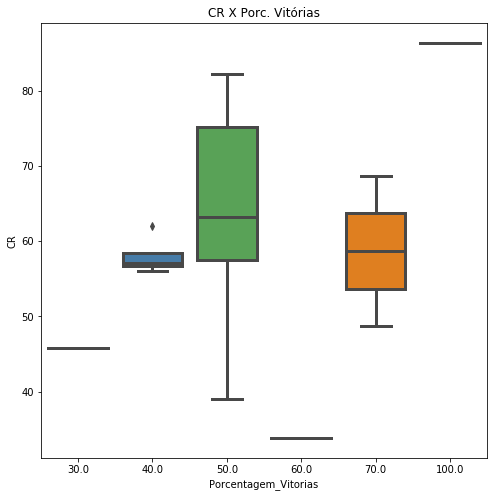

In [316]:
# Porcentagem de Vitorias x CR
categad = pd.DataFrame(jogaLol, columns=['CR', 'Porcentagem_Vitorias'])
arr = []
for pv in categad['Porcentagem_Vitorias']:
    if pv%10>=5:
        arr.append(pv-(pv%10)+10)
    else:
        arr.append(pv-pv%10)
categad['Porcentagem_Vitorias'] = arr

plt.figure(figsize=(8,8))
sns.boxplot(x='Porcentagem_Vitorias', y='CR', palette="Set1", data=categad, linewidth=3)
plt.title('CR X Porc. Vitórias')
plt.show()

In [ ]:
# Horas Jogadas x CR
categad = pd.DataFrame(jogaLol, columns=['CR', 'Horas_Jogadas'])
arr = []
for pv in categad['Horas_Jogadas']:
    if pv%500>=250:
        arr.append(pv-(pv%500)+500)
    else:
        arr.append(pv-pv%500)
categad['Horas_Jogadas'] = arr

plt.figure(figsize=(8,8))
sns.boxplot(x='Horas_Jogadas', y='CR', palette="Set1", data=categad, linewidth=3)
plt.title('CR X Horas Jogadas')
plt.show()

### Algumas análises aleatórias a partir daqui:

In [386]:
deveriaFormar = tabela[tabela['Ano_Ingresso']<2015]
print("Média de quem já deveria estar formado: ", deveriaFormar['CR'].mean())

Média de quem já deveria estar formado:  58.5875


Text(0,0.5,'Campeão')

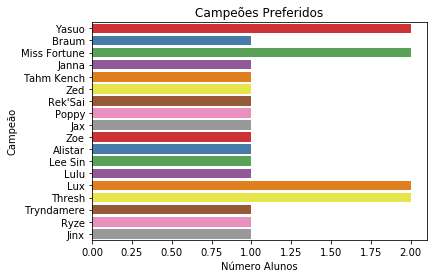

In [271]:
sns.countplot(y='Campeao_Preferido', data=jogaLol, palette='Set1')
plt.title('Campeões Preferidos')
plt.xlabel('Número Alunos')
plt.ylabel('Campeão')

Text(0,0.5,'Número Alunos')

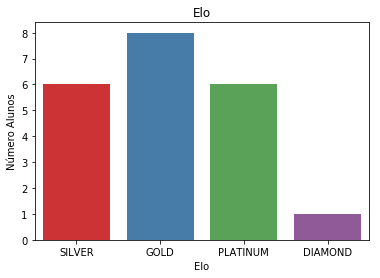

In [274]:
comRank = jogaLol.loc[jogaLol.Elo.notnull()]
sns.countplot(x='Elo', data=comRank, palette='Set1', order=['SILVER', 'GOLD', 'PLATINUM', 'DIAMOND'])
plt.title('Elo')
plt.ylabel('Número Alunos')

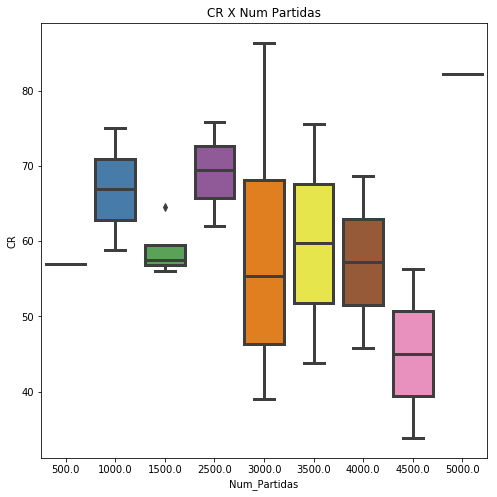

In [279]:
categad = pd.DataFrame(comRank, columns=['CR', 'Num_Partidas'])
plt.figure(figsize=(8,8))
arr = []
for pv in categad['Num_Partidas']:
    if pv%500>=250:
        arr.append(pv-(pv%500)+500)
    else:
        arr.append(pv-pv%500)
categad['Num_Partidas'] = arr

sns.boxplot(x='Num_Partidas', y='CR', palette="Set1", data=categad, linewidth=3)
plt.title('CR X Num Partidas')
plt.show()

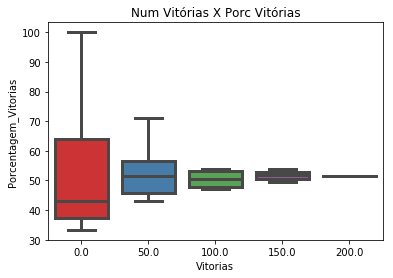

In [289]:
categad = pd.DataFrame(comRank, columns=['Porcentagem_Vitorias', 'Vitorias'])
arr = []
for pv in categad['Vitorias']:
    if pv%50>=25:
        arr.append(pv-(pv%50)+50)
    else:
        arr.append(pv-pv%50)
categad['Vitorias'] = arr
sns.boxplot(x='Vitorias', y='Porcentagem_Vitorias', palette="Set1", data=categad, linewidth=3)
plt.title('Num Vitórias X Porc Vitórias')
plt.show()

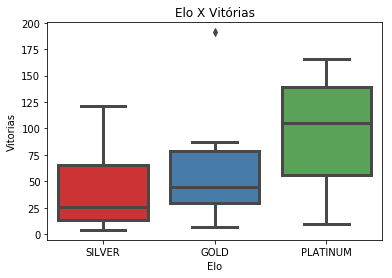

In [293]:
categad = pd.DataFrame(comRank, columns=['Elo', 'Vitorias'])
sns.boxplot(x='Elo', y='Vitorias', palette="Set1", data=categad, linewidth=3, order=['SILVER', 'GOLD', 'PLATINUM'])
plt.title('Elo X Vitórias')
plt.show()

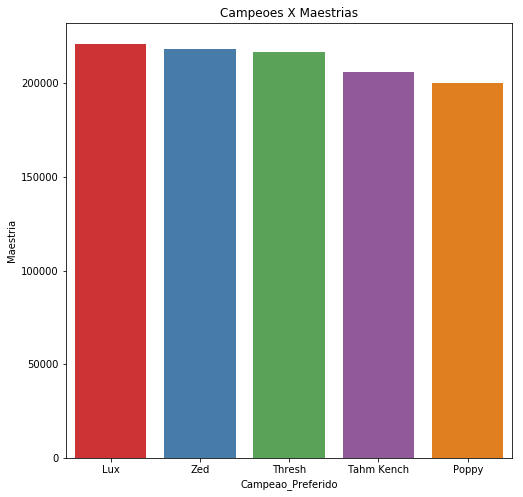

In [313]:
maisMaestria = jogaLol[jogaLol['Maestria']>200000]
mostrar = maisMaestria[['Campeao_Preferido', 'Maestria']]
mostrar = mostrar.sort_values(by='Maestria', ascending=False).head(5)

categad = pd.DataFrame(maisMaestria, columns=['Campeao_Preferido', 'Maestria'])
plt.figure(figsize=(8,8))
sns.barplot(x='Campeao_Preferido', y='Maestria', palette="Set1", data=categad, linewidth=3, order=mostrar['Campeao_Preferido'])
plt.title('Campeoes X Maestrias')
plt.show()

In [317]:
maisWinrate = jogaLol[jogaLol['Porcentagem_Vitorias']>60]
maisWinrate.Porcentagem_Vitorias.sort_values(ascending=False).head(3)

15    100.00
16     71.05
40     70.00
Name: Porcentagem_Vitorias, dtype: float64

In [75]:
maestriaCampeoes = jogaLol.groupby('Campeao_Preferido')['Maestria'].sum()
maestriaCampeoes.sort_values(ascending=False).head(3)

Campeao_Preferido
Thresh    401403.0
Lux       339993.0
Zed       218438.0
Name: Maestria, dtype: float64

In [92]:
print("Nível Médio: ", jogaLol['Nivel'].mean(), "\nNível Max: ", jogaLol['Nivel'].max())
print("Num Partidas Médio: ", jogaLol['Num_Partidas'].mean(), "\nNum Partidas Max: ", jogaLol['Num_Partidas'].max())
print("Horas Média: ", jogaLol['Horas_Jogadas'].mean(), "\nHoras Max: ", jogaLol['Horas_Jogadas'].max())
print("Maestria Média: ", jogaLol['Maestria'].mean(), "\nMaestria Max: ", jogaLol['Maestria'].max())
print("Winrate Médio: ", jogaLol['Porcentagem_Vitorias'].mean(), "\nWinrate Max: ", jogaLol['Porcentagem_Vitorias'].max())

Nível Médio:  99.36363636363636 
Nível Max:  164.0
Num Partidas Médio:  2656.9545454545455 
Num Partidas Max:  4778.0
Horas Média:  1549.4545454545455 
Horas Max:  2787.0
Maestria Média:  131971.0 
Maestria Max:  221069.0
Winrate Médio:  52.59428571428572 
Winrate Max:  100.0
